# Loading Dataset

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed
SEED = 412122
np.random.seed(SEED)

# Load dataset
data = pd.read_csv(r"C:/Users/Neo/Desktop/UI project/Gesture UI/dataset.txt", sep='\s+', header=None)
targets = pd.read_csv(r"C:/Users/Neo/Desktop/UI project/Gesture UI/targets.txt", header=None)

# Load feature names
features = pd.read_csv(r"C:/Users/Neo/Desktop/UI project/Gesture UI/features.txt", sep='\s+', header=None, usecols=[1])
features = features.squeeze().tolist()

# Assign feature names to the dataset
data.columns = features

# Verify the data
print("Dataset:")
print(data.head())

print("\nTargets:")
print(targets.head())



<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Neo\AppData\Local\Temp\ipykernel_13068\2579336512.py:11: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(r"C:/Users/Neo/Desktop/UI project/Gesture UI/dataset.txt", sep='\s+', header=None)
C:\Users\Neo\AppData\Local\Temp\ipykernel_13068\2579336512.py:15: SyntaxWarning: invalid escape sequence '\s'
  features = pd.read_csv(r"C:/Users/Neo/Desktop/UI project/Gesture UI/features.txt", sep='\s+', header=None, usecols=[1])


Dataset:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBo

## Examination of the data and adding prints to visualize data loaded

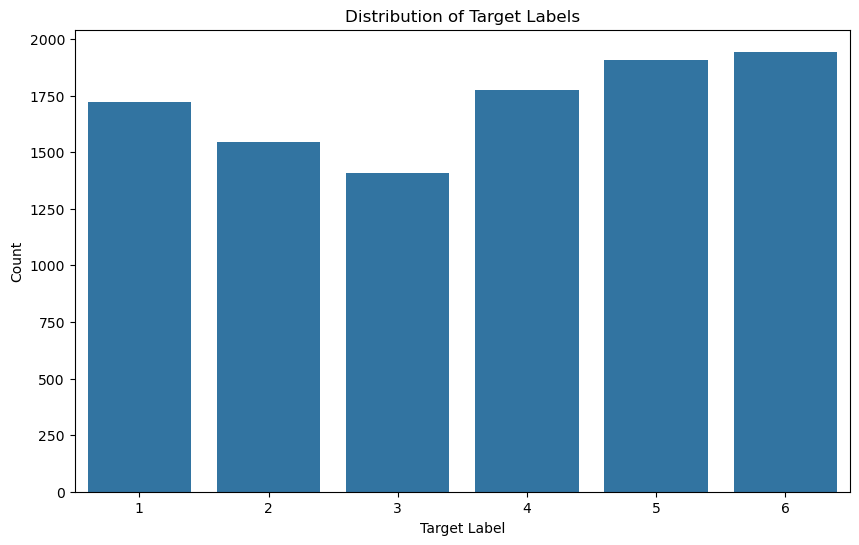

In [30]:
# Distribution of target labels
plt.figure(figsize=(10, 6))
sns.countplot(x=targets[0])
plt.title('Distribution of Target Labels')
plt.xlabel('Target Label')
plt.ylabel('Count')
plt.show()




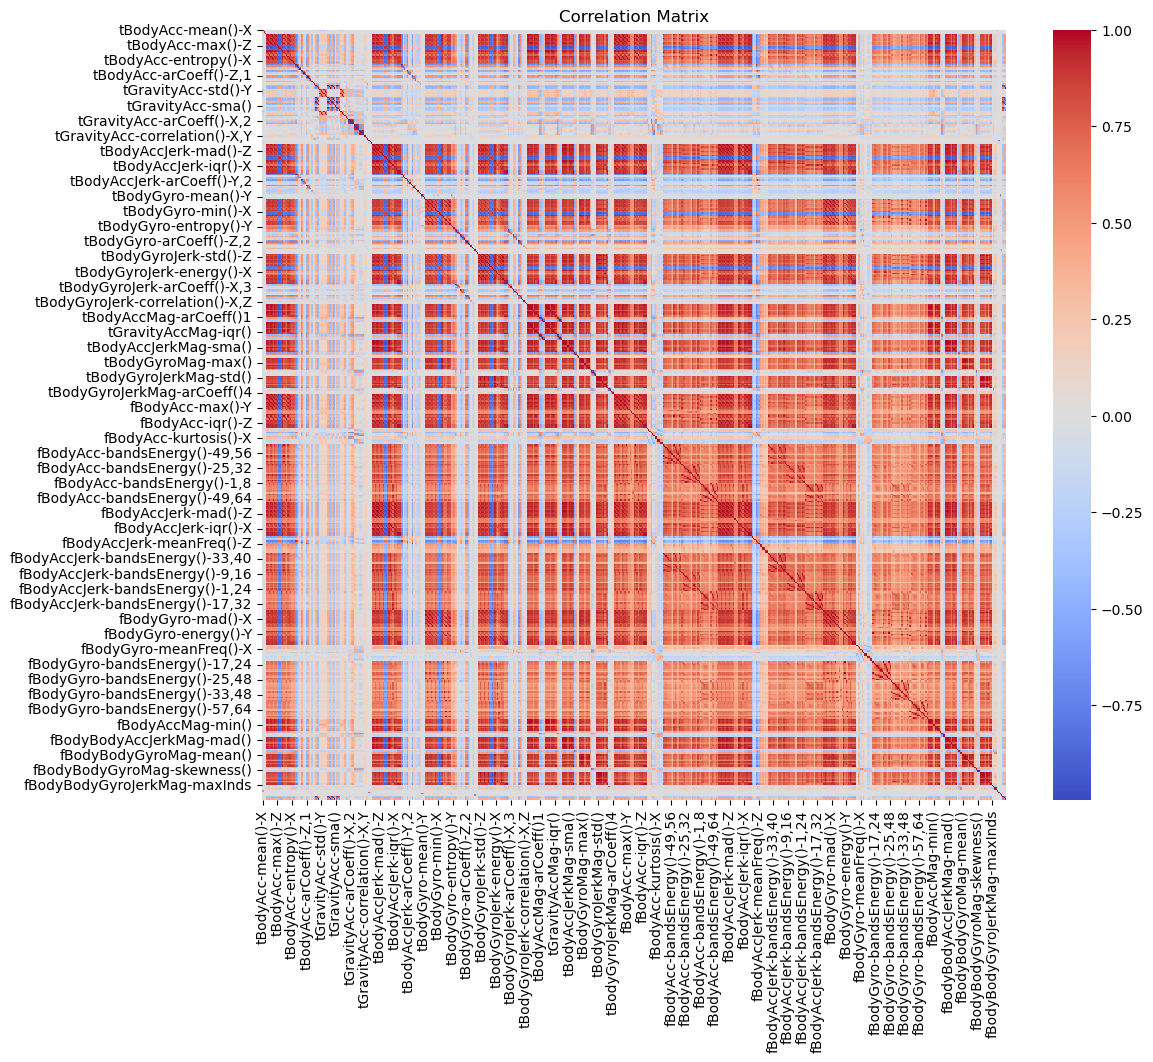

In [31]:
# Correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



Missing values in each column:
 Series([], dtype: int64)


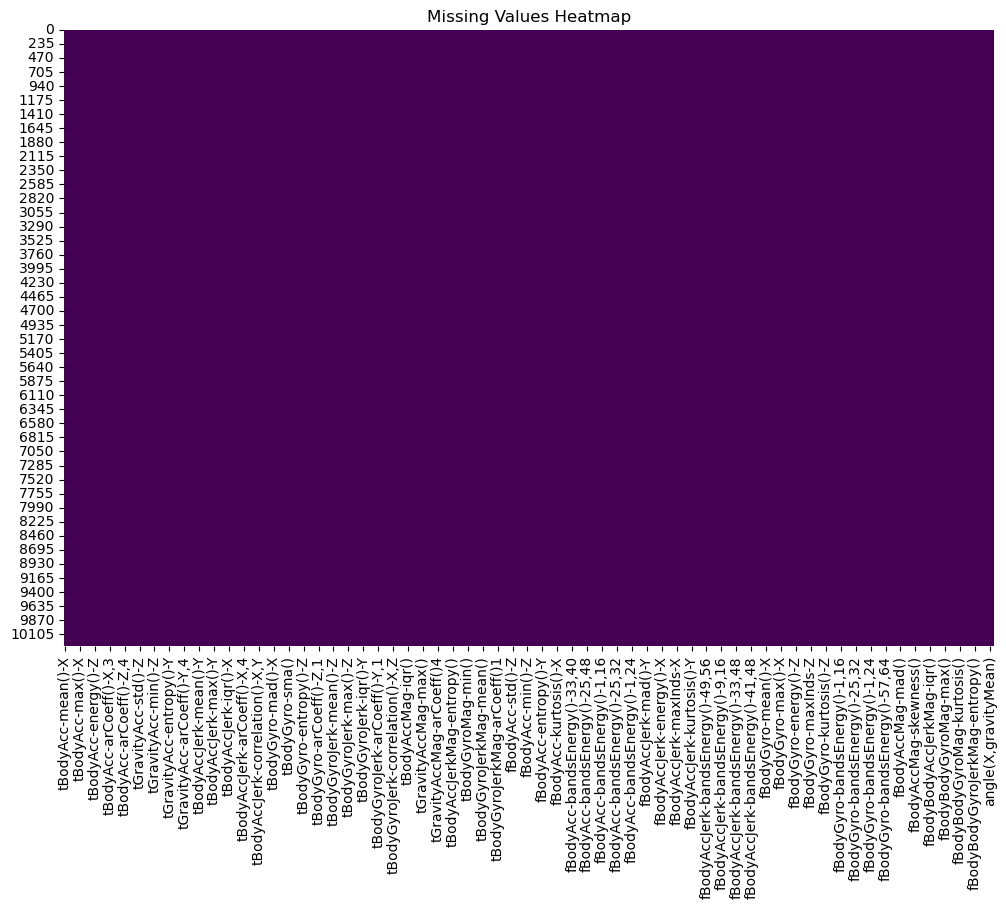

In [32]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

# Visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()



Class distribution:
 0
6    1944
5    1906
4    1777
1    1722
2    1544
3    1406
Name: count, dtype: int64


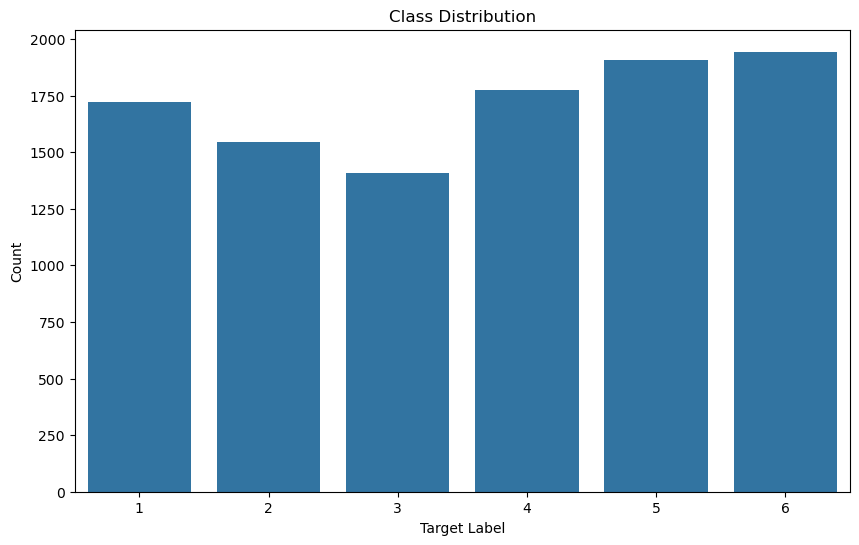

In [33]:
# Checking for class imbalance
class_counts = targets[0].value_counts()
print("Class distribution:\n", class_counts)

# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=targets[0])
plt.title('Class Distribution')
plt.xlabel('Target Label')
plt.ylabel('Count')
plt.show()



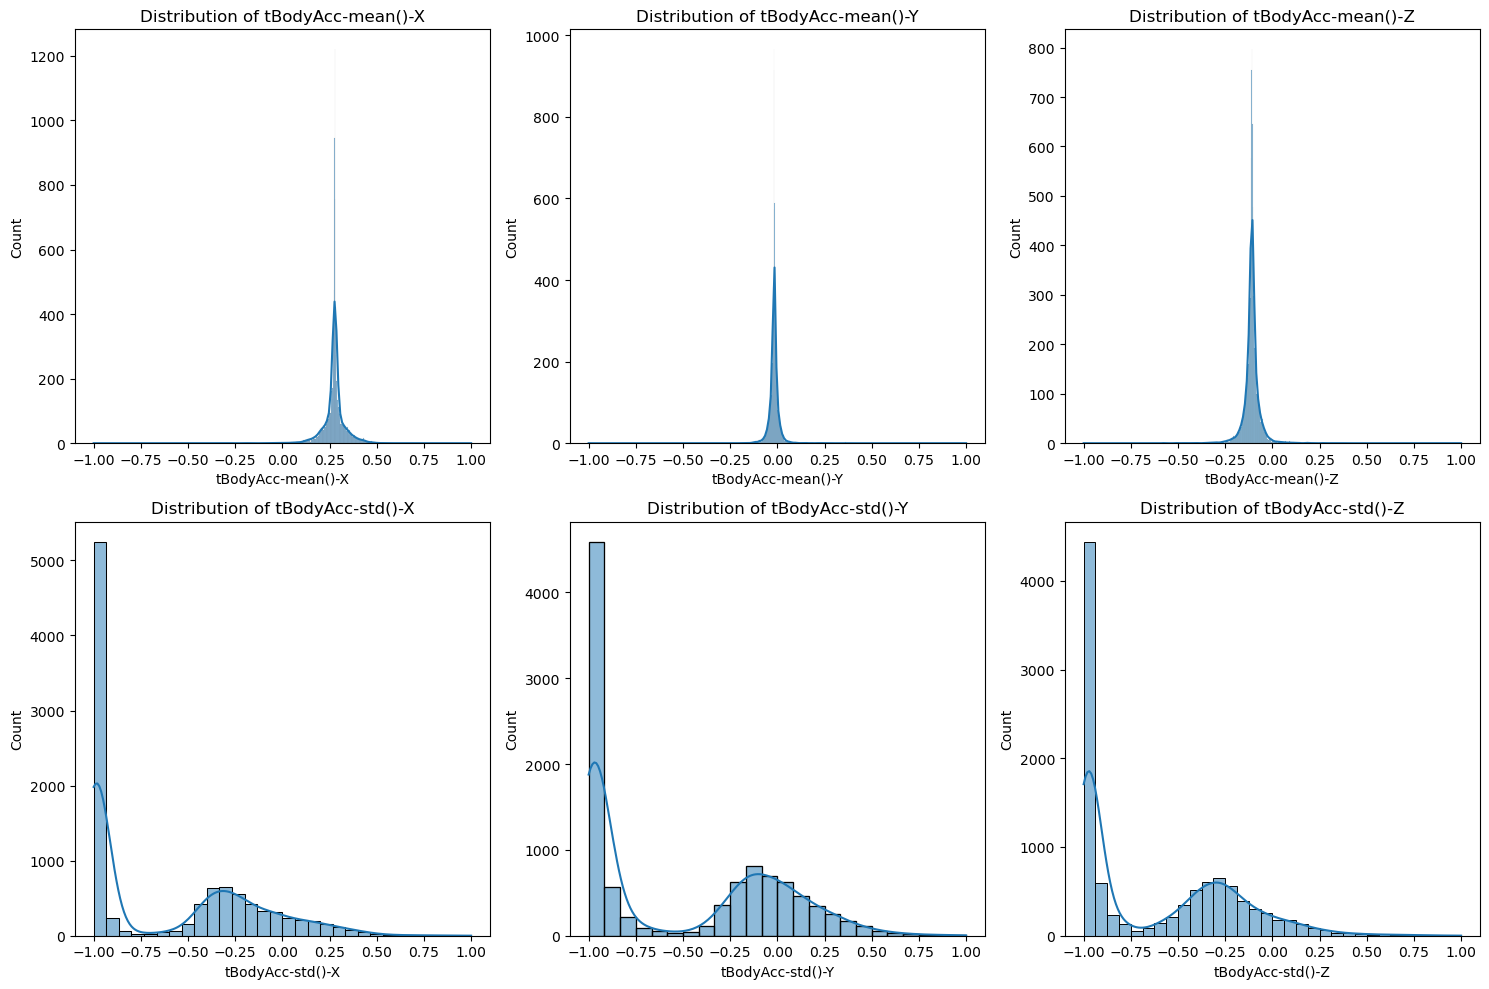

In [34]:
# Distribution of some features
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:6], 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Preprocessing the Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Shuffling data
shuffled_indices = np.random.permutation(len(data))
train_size = int(0.7 * len(data))

train_indices = shuffled_indices[:train_size]
test_indices = shuffled_indices[train_size:]

train_data, test_data = data.iloc[train_indices], data.iloc[test_indices]
train_labels, test_labels = targets.iloc[train_indices], targets.iloc[test_indices]

# Scaling the features
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Verifying shape
print("Train data shape:", train_data_scaled.shape)
print("Test data shape:", test_data_scaled.shape)

Train data shape: (7209, 561)
Test data shape: (3090, 561)


# Initializing Models

In [23]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initializing models
svm_model = SVC(kernel='linear', random_state=SEED)
knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(n_estimators=100, random_state=SEED)

# Training and Evaluating Models

In [24]:
from sklearn.model_selection import cross_val_score

# Cross-validation
svm_score = cross_val_score(svm_model, train_data_scaled, train_labels.values.ravel(), cv=5).mean()
knn_score = cross_val_score(knn_model, train_data_scaled, train_labels.values.ravel(), cv=5).mean()
rf_score = cross_val_score(rf_model, train_data_scaled, train_labels.values.ravel(), cv=5).mean()

# Results
print("SVM Accuracy:", svm_score)
print("kNN Accuracy:", knn_score)
print("Random Forest Accuracy:", rf_score)

SVM Accuracy: 0.981550510558144
kNN Accuracy: 0.953114024491776
Random Forest Accuracy: 0.9747542978032863


# Trained the models on the entire training & predictions made on test set

In [26]:
# Training the models
svm_model.fit(train_data_scaled, train_labels.values.ravel())
knn_model.fit(train_data_scaled, train_labels.values.ravel())
rf_model.fit(train_data_scaled, train_labels.values.ravel())

# Predictions
svm_predictions = svm_model.predict(test_data_scaled)
knn_predictions = knn_model.predict(test_data_scaled)
rf_predictions = rf_model.predict(test_data_scaled)

print ("SVM Predictions:")
print(svm_predictions)  
print("\nkNN Predictions:") # Display the predictions  
print(knn_predictions)
print("\nRandom Forest Predictions:") # Display the predictions
print(rf_predictions)  


SVM Predictions:
[5 6 5 ... 5 1 5]

kNN Predictions:
[5 6 4 ... 5 1 5]

Random Forest Predictions:
[5 6 5 ... 5 1 5]


# Analyzing Predictions

SVM Test Accuracy: 0.9809061488673139
SVM Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       510
           2       1.00      1.00      1.00       437
           3       1.00      1.00      1.00       430
           4       0.94      0.96      0.95       534
           5       0.96      0.94      0.95       581
           6       1.00      1.00      1.00       598

    accuracy                           0.98      3090
   macro avg       0.98      0.98      0.98      3090
weighted avg       0.98      0.98      0.98      3090



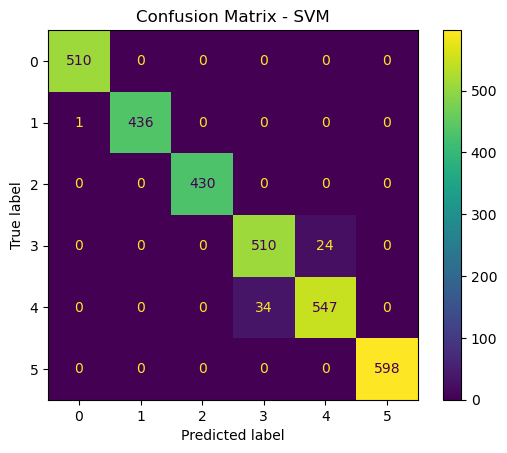

kNN Test Accuracy: 0.9601941747572815
kNN Classification Report:
               precision    recall  f1-score   support

           1       0.97      1.00      0.98       510
           2       0.98      0.99      0.99       437
           3       1.00      0.96      0.98       430
           4       0.92      0.89      0.91       534
           5       0.90      0.93      0.92       581
           6       1.00      0.99      1.00       598

    accuracy                           0.96      3090
   macro avg       0.96      0.96      0.96      3090
weighted avg       0.96      0.96      0.96      3090



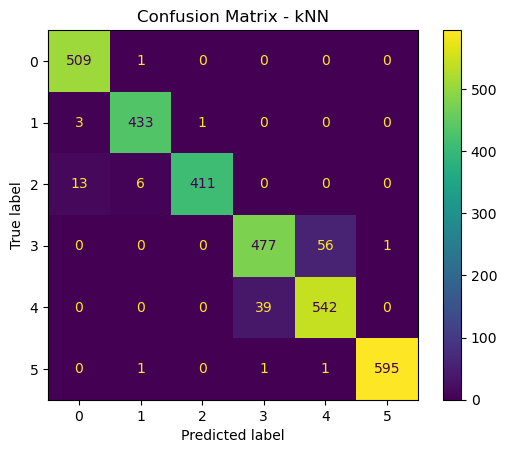

Random Forest Test Accuracy: 0.9718446601941747
Random Forest Classification Report:
               precision    recall  f1-score   support

           1       0.99      0.98      0.99       510
           2       0.97      0.99      0.98       437
           3       0.97      0.97      0.97       430
           4       0.94      0.96      0.95       534
           5       0.96      0.95      0.95       581
           6       1.00      1.00      1.00       598

    accuracy                           0.97      3090
   macro avg       0.97      0.97      0.97      3090
weighted avg       0.97      0.97      0.97      3090



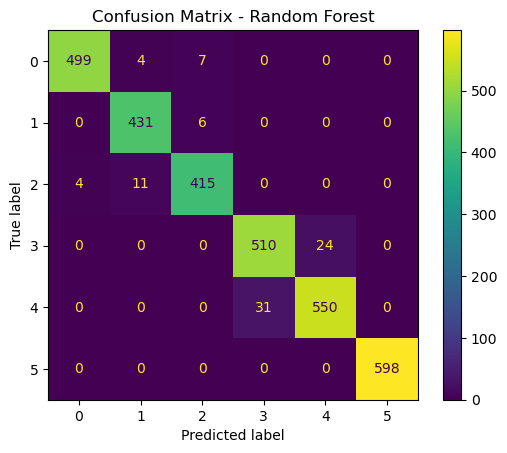

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Evaluating SVM
print("SVM Test Accuracy:", accuracy_score(test_labels, svm_predictions))
print("SVM Classification Report:\n", classification_report(test_labels, svm_predictions))

# Confusion Matrix for SVM
cm_svm = confusion_matrix(test_labels, svm_predictions)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot()
plt.title('Confusion Matrix - SVM')
plt.show()

# Evaluating kNN
print("kNN Test Accuracy:", accuracy_score(test_labels, knn_predictions))
print("kNN Classification Report:\n", classification_report(test_labels, knn_predictions))

# Confusion Matrix for kNN
cm_knn = confusion_matrix(test_labels, knn_predictions)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot()
plt.title('Confusion Matrix - kNN')
plt.show()

# Evaluating Random Forest
print("Random Forest Test Accuracy:", accuracy_score(test_labels, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(test_labels, rf_predictions))

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(test_labels, rf_predictions)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()